# **Description**
This script is designed to extract sugar information from nutrition label images using OCR techniques. It utilizes the pytesseract library for text recognition and PIL for image manipulation.

# Install Libraries
Before running the script, ensure that you have installed all the required libraries. You can do this by executing the following commands in a Google Colab cell:

In [3]:
!pip install easyocr opencv-python matplotlib
!pip install pytesseract
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# Usage Steps
1.   Upload Image: The script will prompt you to upload an image containing nutrition information. Ensure that the image is clear and that the sugar information is legible.
2. Process Image: Once the image is uploaded, the script will open and display the image.
3.   Extract Sugar Information: The script will crop the image to focus on the area containing the nutrition information and use pytesseract to extract text from the cropped image.
4. Display Results: The extracted sugar information will be displayed in the console. If no sugar information is found, the script will provide an appropriate message.





Saving test (8).jpg to test (8).jpg


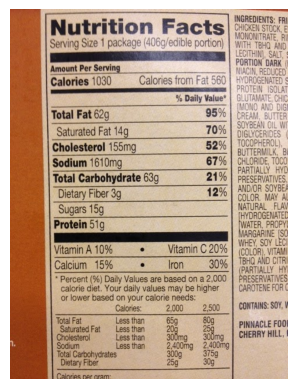

Sugar information from image test (8).jpg: Sugars 15g


In [13]:
from google.colab import files
from PIL import Image
import pytesseract
import os
import matplotlib.pyplot as plt

# Function to crop and extract sugar information from an image
def extract_sugar_info_with_crop(image):
    # Define crop area (manually identified for general nutrition fact areas)
    # Format: (left, upper, right, lower)
    crop_area = (50, 50, image.width - 50, image.height - 50)  # Adjust this as necessary
    cropped_img = image.crop(crop_area)

    # Extract text from the cropped image
    extracted_text = pytesseract.image_to_string(cropped_img, lang='eng+ind')

    # Search for sugar information in the extracted text
    sugar_info = None
    for line in extracted_text.splitlines():
        if "gula" in line.lower() or "sugars" in line.lower():
            sugar_info = line
            break

    return sugar_info if sugar_info else "Sugar information not found in the image."

# Upload image through Google Colab
uploaded = files.upload()

# If an image is uploaded, process it
for image_name in uploaded.keys():
    try:
        # Open the uploaded image
        img = Image.open(image_name)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis('off')  # Hide the axis
        plt.show()

        # Extract sugar information
        sugar_info = extract_sugar_info_with_crop(img)

        # Display the extracted sugar information
        print(f"Sugar information from image {image_name}: {sugar_info}")
    finally:
        # Delete the uploaded file after processing
        if os.path.exists(image_name):
            os.remove(image_name)
